In [100]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Check for null values

In [101]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# BloodPressure 0 doesn't seem right.
# Impute the mean BP wherever BP=0

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

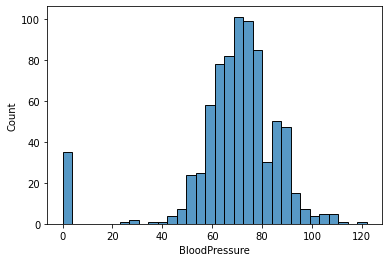

In [102]:
import seaborn as sns

sns.histplot(df.BloodPressure)

In [67]:
df[(df['BloodPressure']==0)] = df[(df['BloodPressure']!=0)].mean()

# Find the average Blood Pressure, SkinThickness and Age for people with Diabetes and no Diabetes

In [98]:
df[['BloodPressure', 'SkinThickness', 'Age']].groupby(df['Outcome']).mean()

,BloodPressure,SkinThickness,Age
Outcome,,,
0.000000,70.877339,20.392931,31.234927
0.343793,72.405184,21.444748,33.361528
1.000000,75.321429,23.452381,37.420635


# Which factor is most correlated with the target and which is least?

In [96]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137170,0.214178,-0.097440,-0.078620,0.019370,-0.030364,0.559414,0.230619
Glucose,0.137170,1.000000,0.221436,0.055790,0.337635,0.198786,0.134976,0.260742,0.458410
BloodPressure,0.214178,0.221436,1.000000,0.006357,-0.047375,0.258735,-0.002805,0.330107,0.170589
SkinThickness,-0.097440,0.055790,0.006357,1.000000,0.417892,0.394566,0.175213,-0.135420,0.092587
Insulin,-0.078620,0.337635,-0.047375,0.417892,1.000000,0.192517,0.181457,-0.050697,0.143465
BMI,0.019370,0.198786,0.258735,0.394566,0.192517,1.000000,0.123151,0.006823,0.290653
DiabetesPedigreeFunction,-0.030364,0.134976,-0.002805,0.175213,0.181457,0.123151,1.000000,0.019979,0.178271
Age,0.559414,0.260742,0.330107,-0.135420,-0.050697,0.006823,0.019979,1.000000,0.248376
Outcome,0.230619,0.458410,0.170589,0.092587,0.143465,0.290653,0.178271,0.248376,1.000000
